In [3]:
from sympy import *
from sympy.physics.units import *
import matplotlib.pyplot as plt
init_printing()

Problem 1.1)  
The given values are inserted into the equation for $U_T$

In [47]:
IS = 1e-10
k = 1.38e-23
T = 300
q = 1.602e-19
IF, UF = symbols('I_F U_F')
UT = k*T/q
print(f"UT = {UT}")

UT = 0.025842696629213485


The equation for $I_F$ as a function of $U_F$ is given as eqn1 while $U_F$ as function of $I_F$ is given as eqn2. eqn2 is plottet over the interval $I_F\in \left[0,10 \right]$

Here it can be seen, that the diode allows current to pass from around $0.5V$ to $0.6V$

Problem 1.2)  
The new temperature is used to calculate a new $U_{T2}$. This is used to calculate the forward voltage when the forward current is $5A$ in the cases with $300K$ and $200K$ respectively

In [51]:
T2 = 200
UT2 = k*T2/q
IF2 = 5
UF2 = Eq(Symbol('U_{F200K}'), UT2*log(IF2/IS+1))
eqn2.subs({UF:Symbol('U_F300K'),IF:5}),UF2

From this it can be seen that the drop in temperature gives a reduction in forward voltage of about $0.2V$

Problem 1.3)  
An explenation of the semiconductor concept is that a material that normally cannot conduct current can become a conductor if the valens electrons in the atoms in the crystal become excited and leave the atoms. This creates charge imbalances within the crystal that leads to a current. By doping a crystal of tetravalent silicon atoms with trivalent boron and pentavalent phosphorus, these charge balances can be induced to create a pn-junction to block current until sufficient voltage is applied over the diode.

Problem 2.a)
Yes. The voltage drop must be the same across both diodes. Since the forward voltage depends on the forward current, these forward currents must differ if the diodes have different characteristics.

Problem 2.b)  
By using the equation for $U_F$ as a fundtion of the diode (forward) current $I_D$ as well as KCL, a system of three equations can be made. It is assumed that $U_F$ and $U_T$  is the same for both diodes while $I_S$ is different between the diodes. 

In [66]:
#Symbols are defined
UD1,UD2,UT,ID1,ID2,IS1,IS2,Iin = symbols('U_{D1} U_{D2} U_T I_{D1} I_{D2},I_{S1} I_{S2} I_{in}')

#The two eqtions for the forward voltage are defined
eqn1 = Eq(UF, UT*log(ID1/IS1+1))
eqn2 = Eq(UF, UT*log(ID2/IS2+1))

#The KCL equation for the current is defined
eqn3 = Eq(Iin, ID1+ID2)

#These equtions are printed here
eqn1,eqn2,eqn3

This system of equations can be solved to get the forward currents as a function of the saturation currents and the total current; $I_{S1}, I_{S2}, I_{in}$

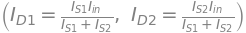

In [88]:
sol = solve([eqn1,eqn2,eqn3],(ID1,ID2,UF))[0]
Eq(ID1,sol[0]),Eq(ID2,sol[1])

Here it can be seen, that the diode currents depends on the proportion of a diode's saturation to the sum of parallel saturation currents multiplied by the total current

Problem 3.a)  
To estimate the dynamical potential and voltages, it is necessary to fit a tangent line to the function. By assuming the majority of the graph is linear, two suitable points have been read from the graph $(1.2V,25A), (1.4,42.5A)$. The dynamic resistance between these points is given as the coefficient of the difference in voltage and the difference in current

In [101]:
#Points are defined
U1,I1 = 1.2*volt,25*ampere
U2,I2 = 1.4*volt,42.5*ampere

#The dynamic resistance is calculated as the slope of the line between the two points
RD = convert_to(((U2-U1)/(I2-I1)).simplify(),ohm)
Eq(Symbol('R_D'),RD)

The dynamic voltage is the intercept of the line through the points and the current-axis

In [115]:
UD = convert_to(U1-RD*I1,volt)
Eq(Symbol('U_D'),UD)

U_D = 0.914285714285714⋅volt

Problem 3.2)  
The junction loss can be estimated from the values calulated above and the given average and RMS currents as $P_D = U_D \cdot I_{AV} + R_D \cdot I_{RMS}^2$

In [118]:
#The given currents are defined
IRMS = 25*ampere
IAV = 12*ampere

#The junction loss is calculated with the given formula
P=UD*IAV + convert_to(RD*IRMS**2,watt)
Eq(Symbol('P_D'),convert_to(P.simplify(),watt))

P_D = 18.1142857142857⋅watt

Problem 4.a)  
In the case with antiparallel diodes, the current will only be able to run in one direction at a time. During the positive half og the cycle, the current will run clockwise through D1 (red arrows). In the negative half, the current will run counter-clockwise through D2 (green arrows). This is illustrated below

The current will only start running when the voltage surpasses $\pm V_{D,on}$. From that point, the forward voltage and currents follow a linear relationship proportional to R1

Problem 5)
The 4 different circuits are analyzed individually:

Problem 5.1)  
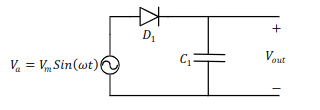  
In this circuit, current can only flow when the top rail is positive compared to the bottom rail. This will charge the capacitor every cycle. The capacitor is not able to discharge at any point, so $V_{out}$ will increase every cycle to approach $V_m$

Problem 5.2)  
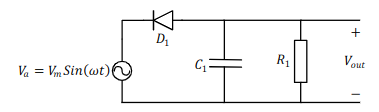  
Compared to the last circuit, the capacitor is now able to discharge over the resistor. During the positive cycle, the voltage will rise when the bottom rail is positive and fall when $V_a$ is lower than the capacitor voltage.

Problem 5.3)  
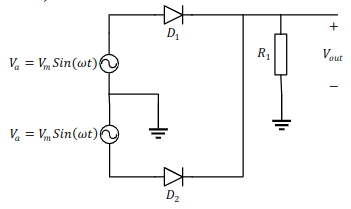  
This center tapped full wave rectifier will turn make the voltage of positive during both halves of the cycle. In the first half, current can run through $D_1$ and $R_1$ into ground. In the other half, the current can run through $R_2$ instead. Since the power supply is center tapped, $V_{out}$ will only be half of $V_a - V_{d,on}$.

Problem 5.4)  
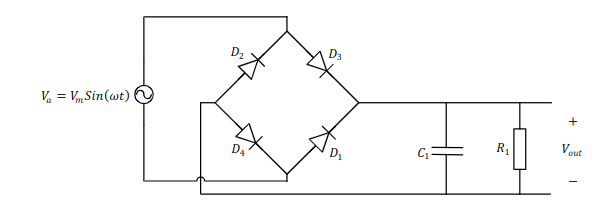  
This full bridge rectifier will give the full voltage of $V_a$ turned positive. The capacitor will charge during both halves of the cycle as long as its voltage is higher than $|V_a|$ and discharge when it is lower. This smooths the rectified wave into a more constant voltage resembling DC.

Graphs)  
The graphs showing $V_a$ (in black) and $V_{out}$ (in blue) over time for all 4 circuits can be seen here  
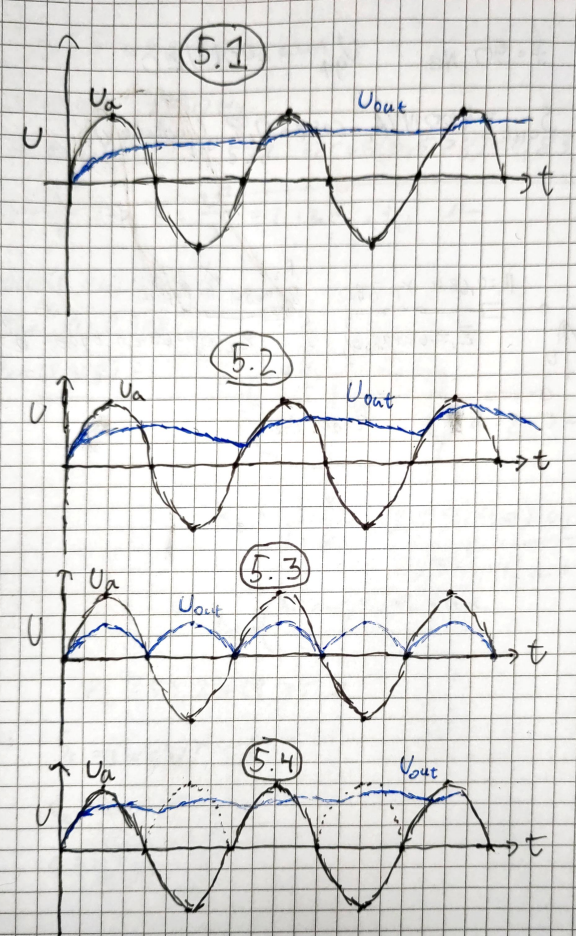